# DATA

In [142]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [143]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
signal=np.array(WE)-np.array(AE)
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
SO2_Data.shape

(45117, 9)

In [144]:
def MBE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    mbe=np.mean(true-pred)
    return mbe
def CRMSE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    crmse=np.sqrt(np.mean(((true-np.mean(true))-(pred-np.mean(pred)))**2))
    if np.std(pred)>np.std(true):
        crmse=crmse
    else:
        crmse=-crmse
    return crmse

In [145]:
df1=[x for _, x in SO2_Data.groupby('Month')]
data_oct=df1[4]
#data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
#data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
#data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
#data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
#data_feb=data_feb.sample(frac=1)
data_mar=df1[2]
#data_mar=data_mar.sample(frac=1)
data_apr=df1[3]
#data_apr=data_apr.sample(frac=1)
data=[data_oct,data_nov,data_dec,data_jan,data_feb,data_mar]
data_apr.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour
Date,,,,,,,,,
2020-04-01 00:00:00,206.689526,14.224363,81.013117,32.051925,83.145454,4,2,1,0
2020-04-01 00:05:00,231.991357,14.151996,81.100364,54.851193,96.141677,4,2,1,0
2020-04-01 00:10:00,224.983581,14.052602,81.393542,42.003665,92.622032,4,2,1,0
2020-04-01 00:15:00,238.164182,13.940990,81.853934,48.654250,99.526459,4,2,1,0
2020-04-01 00:20:00,230.408806,13.885786,82.044025,208.062700,96.067164,4,2,1,0


In [146]:
data_Oct=data_oct.resample('h').mean()
data_Oct=data_Oct.dropna()
data_Nov=data_nov.resample('h').mean()
data_Nov=data_Nov.dropna()
data_Dec=data_dec.resample('h').mean()
data_Dec=data_Dec.dropna()
data_Jan=data_jan.resample('h').mean()
data_Jan=data_Jan.dropna()
data_Feb=data_feb.resample('h').mean()
data_Feb=data_Feb.dropna()
data_Mar=data_mar.resample('h').mean()
data_Mar=data_Mar.dropna()
data_Apr=data_apr.resample('h').mean()
data_Apr=data_Apr.dropna()

# Mothly schemes

# Oct 2019

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [148]:
#,'Month','Day_of_week','Day','Hour'
X=data_oct[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_oct['Ref']
X_test=data_Oct[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y_test=data_Oct['Ref']
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum1=sum(A[:100])
mean1=np.std(y)/np.mean(y)

Text(0.5, 1.0, 'CO')

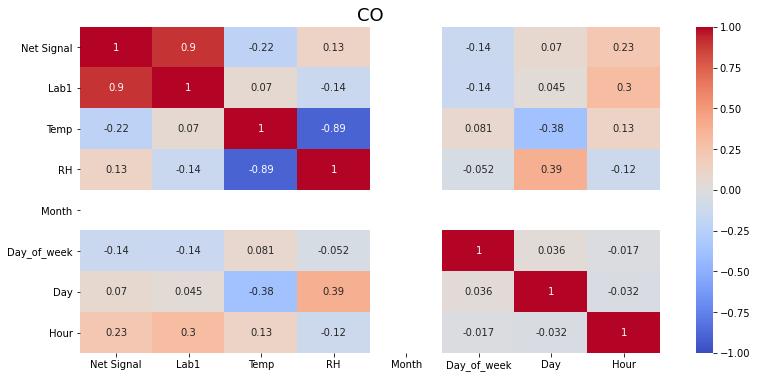

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.figure(figsize=(13,6))
sns.heatmap(X.corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')
plt.title('CO',fontsize=18)

# RF

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_absolute_error as mae
#from sklearn.metrics import mean_absolute_percentage_error
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)


In [151]:
Day=[2*i for i in range(1,21) ]
Rmse1_rf=[]
RMSE1_rf=[]
for i in range(1,11):
    regressor.fit(X[:576*i].drop(['Lab1'], axis=1), y[:576*i])
    pred=regressor.predict(X_test)
    #mse=round(sm.r2_score(y_test, pred), 2)
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse1_rf.append(mse)
    RMSE1_rf.append(rmse)

In [152]:
Rmse1_rf

[0.41, 0.37, 0.37, 0.22, 0.21, 0.22, 0.27, 0.18, 0.2, 0.15]

In [153]:
RMSE1_rf

[0.82, 0.89, 0.89, 0.95, 0.96, 0.95, 0.92, 0.96, 0.96, 0.98]

In [154]:
A=y.to_list()
Ext_oct=[]
for i in range(len(A)):
    if A[i]>3*np.mean(A):
        Ext_oct.append(i)
N_Ext_oct=len(Ext_oct)
N_Ext_oct

203

In [155]:
mean_oct=np.mean(y)
N_oct=y.shape[0]
Mean_Rmse_oct=np.mean(Rmse1_rf)

# XGBoost

In [156]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)

In [157]:
Rmse1_ann=[]
RMSE1_ann=[]
for i in range(1,11):
    model.fit(X[:576*i].drop(['Lab1'], axis=1), y[:576*i])
    pred=model.predict(X_test)
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse1_ann.append(mse)
    RMSE1_ann.append(rmse)


In [158]:
Rmse1_ann


[0.45, 0.36, 0.36, 0.23, 0.24, 0.24, 0.24, 0.18, 0.2, 0.15]

In [159]:
RMSE1_ann

[0.77, 0.89, 0.9, 0.95, 0.94, 0.94, 0.94, 0.96, 0.96, 0.98]

# Nov 2019

   #   RF

In [160]:
X=data_nov[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_nov['Ref']
X_test=data_Nov[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y_test=data_Nov['Ref']
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum2=sum(A[:100])
mean2=np.std(y)/np.mean(y)
Rmse2_rf=[]
RMSE2_rf=[]
for i in range(1,11):
    regressor.fit(X[:576*i].drop(['Lab1'], axis=1), y[:576*i])
    pred=regressor.predict(X_test)
    #mse=round(sm.r2_score(y_test, pred), 2)
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse2_rf.append(mse)
    RMSE2_rf.append(rmse)

In [161]:
Rmse2_rf

[0.58, 0.56, 0.35, 0.32, 0.27, 0.25, 0.23, 0.22, 0.18, 0.18]

In [162]:
RMSE2_rf

[0.77, 0.76, 0.91, 0.93, 0.95, 0.96, 0.96, 0.97, 0.98, 0.98]

In [163]:
A=y.to_list()
Ext_nov=[]
for i in range(len(A)):
    if A[i]>3*np.mean(A):
        Ext_nov.append(i)
N_Ext_nov=len(Ext_nov)
N_Ext_nov

370

In [164]:
mean_nov=np.mean(y)
N_nov=y.shape[0]
Mean_Rmse_nov=np.mean(Rmse2_rf)

# XGBoost

In [165]:
Rmse2_ann=[]
RMSE2_ann=[]
for i in range(1,11):
    model.fit(X[:576*i].drop(['Lab1'], axis=1), y[:576*i])
    pred=model.predict(X_test)
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse2_ann.append(mse)
    RMSE2_ann.append(rmse)

In [166]:
Rmse2_ann

[0.62, 0.57, 0.42, 0.41, 0.35, 0.34, 0.26, 0.24, 0.21, 0.16]

In [167]:
RMSE2_ann

[0.68, 0.76, 0.87, 0.88, 0.91, 0.93, 0.95, 0.96, 0.97, 0.98]

# Dec 2019

# RF

In [168]:
X=data_dec[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_dec['Ref']
X_test=data_Dec[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y_test=data_Dec['Ref']
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum3=sum(A[:100])
mean3=np.std(y)/np.mean(y)
Rmse3_rf=[]
RMSE3_rf=[]
for i in range(1,11):
    regressor.fit(X[:576*i].drop(['Lab1'], axis=1), y[:576*i])
    pred=regressor.predict(X_test)
    #mse=round(sm.r2_score(y_test, pred), 2)
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse3_rf.append(mse)
    RMSE3_rf.append(rmse)


In [169]:
Rmse3_rf

[0.46, 0.38, 0.36, 0.33, 0.3, 0.31, 0.36, 0.31, 0.29, 0.28]

In [170]:
RMSE3_rf

[0.82, 0.88, 0.91, 0.92, 0.92, 0.92, 0.9, 0.92, 0.93, 0.94]

In [171]:
A=y.to_list()
Ext_dec=[]
for i in range(len(A)):
    if A[i]>3*np.mean(A):
        Ext_dec.append(i)
N_Ext_dec=len(Ext_dec)
N_Ext_dec

288

In [172]:
mean_dec=np.mean(y)
N_dec=y.shape[0]
Mean_Rmse_dec=np.mean(Rmse3_rf)

# XGBoost

In [ ]:
Rmse3_ann=[]
RMSE3_ann=[]
for i in range(1,11):
    model.fit(X[:576*i].drop(['Lab1'], axis=1), y[:576*i])
    pred=model.predict(X_test)
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse3_ann.append(mse)
    RMSE3_ann.append(rmse)

In [ ]:
Rmse3_ann

In [ ]:
RMSE3_ann

# Jan 2020 

# RF

In [ ]:
X=data_jan[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_jan['Ref']
X_test=data_Jan[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y_test=data_Jan['Ref']
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum4=sum(A[:100])
mean4=np.std(y)/np.mean(y)
Rmse4_rf=[]
RMSE4_rf=[]
for i in range(1,11):
    regressor.fit(X[:576*i].drop(['Lab1'], axis=1), y[:576*i])
    pred=regressor.predict(X_test)
    #mse=round(sm.r2_score(y_test, pred), 2)
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse4_rf.append(mse)
    RMSE4_rf.append(rmse)

In [ ]:
A=y.to_list()
Ext_jan=[]
for i in range(len(A)):
    if A[i]>3*np.mean(A):
        Ext_jan.append(i)
N_Ext_jan=len(Ext_jan)
N_Ext_jan

In [ ]:
mean_jan=np.mean(y)
N_jan=y.shape[0]
Mean_Rmse_jan=np.mean(Rmse4_rf)

# XGBoost

In [ ]:
Rmse4_ann=[]
RMSE4_ann=[]
for i in range(1,11):
    model.fit(X[:576*i].drop(['Lab1'], axis=1), y[:576*i])
    pred=model.predict(X_test)
    #mse=round(sm.r2_score(y_test, pred), 2)
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse4_ann.append(mse)
    RMSE4_ann.append(rmse)

# Feb 2020

# RF

X=data_feb[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_feb['Ref']
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum5=sum(A[:100])
mean5=np.std(y)/np.mean(y)
Rmse5_rf=[]
RMSE5_rf=[]
for i in range(1,11):
    regressor.fit(X[:576*i].drop(['Lab1'], axis=1), y[:576*i])
    pred=regressor.predict(X[576*i:].drop(['Lab1'], axis=1))
    y_test=y[576*i:]
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse5_rf.append(mse)
    RMSE5_rf.append(rmse)

A=y.to_list()
Ext_feb=[]
for i in range(len(A)):
    if A[i]>3*np.mean(A):
        Ext_feb.append(i)
N_Ext_feb=len(Ext_feb)
N_Ext_feb

mean_feb=np.mean(y)
N_feb=y.shape[0]
Mean_Rmse_feb=np.mean(Rmse5_rf)

# XGBoost

Rmse5_ann=[]
RMSE5_ann=[]
for i in range(1,11):
    model.fit(X[:576*i].drop(['Lab1'], axis=1), y[:576*i])
    pred=model.predict(X[576*i:].drop(['Lab1'], axis=1))
    y_test=y[576*i:]

    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse5_ann.append(mse)
    RMSE5_ann.append(rmse)

# March 2020

# RF

In [ ]:
X=data_mar[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_mar['Ref']
X_test=data_Mar[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y_test=data_Mar['Ref']
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum6=sum(A[:100])
mean6=np.std(y)/np.mean(y)
Rmse6_rf=[]
RMSE6_rf=[]
for i in range(1,11):
    regressor.fit(X[:576*i].drop(['Lab1'], axis=1), y[:576*i])
    pred=regressor.predict(X_test)
    #mse=round(sm.r2_score(y_test, pred), 2)
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse6_rf.append(mse)
    RMSE6_rf.append(rmse)

In [ ]:
A=y.to_list()
Ext_mar=[]
for i in range(len(A)):
    if A[i]>3*np.mean(A):
        Ext_mar.append(i)
N_Ext_mar=len(Ext_mar)
N_Ext_mar

In [ ]:
mean_mar=np.mean(y)
N_mar=y.shape[0]
Mean_Rmse_mar=np.mean(Rmse6_rf)

# XGBoost

In [ ]:
Rmse6_ann=[]
RMSE6_ann=[]
for i in range(1,11):
    model.fit(X[:576*i].drop(['Lab1'], axis=1), y[:576*i])
    pred=model.predict(X_test)
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse6_ann.append(mse)
    RMSE6_ann.append(rmse)

# April 2020

# RF

X=data_apr[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_apr['Ref']
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum7=sum(A[:100])
mean7=np.std(y)/np.mean(y)
Rmse10_rf=[]
RMSE10_rf=[]
for i in range(1,11):
    regressor.fit(X[:576*i].drop(['Lab1'], axis=1), y[:576*i])
    pred=regressor.predict(X[576*i:].drop(['Lab1'], axis=1))
    y_test=y[576*i:]
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse10_rf.append(mse)
    RMSE10_rf.append(rmse)

A=y.to_list()
Ext_apr=[]
for i in range(len(A)):
    if A[i]>3*np.mean(A):
        Ext_apr.append(i)
N_Ext_apr=len(Ext_apr)
N_Ext_apr

# XGBoost

Rmse10_ann=[]
RMSE10_ann=[]
for i in range(1,11):
    model.fit(X[:576*i].drop(['Lab1'], axis=1), y[:576*i])
    pred=model.predict(X[576*i:].drop(['Lab1'], axis=1))
    y_test=y[576*i:]
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse10_ann.append(mse)
    RMSE10_ann.append(rmse)

mean_apr=np.mean(y)
N_apr=y.shape[0]
Mean_Rmse_apr=np.mean(Rmse10_rf)

Mean_Rmse=[Mean_Rmse_oct,Mean_Rmse_nov,Mean_Rmse_dec,Mean_Rmse_jan,Mean_Rmse_feb,Mean_Rmse_mar,Mean_Rmse_apr]
Mean_conc=[mean_oct,mean_nov,mean_dec,mean_jan,mean_feb,mean_mar,mean_apr]
N=[N_oct,N_nov,N_dec,N_jan,N_feb,N_mar,N_apr]
N_Ext=[N_Ext_oct,N_Ext_nov,N_Ext_dec,N_Ext_jan,N_Ext_feb,N_Ext_mar,N_Ext_apr]

Rmse=[]
for i in range(10):
    A=[Rmse1_rf[i],Rmse2_rf[i],Rmse3_rf[i],Rmse4_rf[i],Rmse5_rf[i],Rmse6_rf[i],Rmse10_rf[i]]
    Rmse.append(A)
RMSE=Rmse[0]+Rmse[1]+Rmse[2]+Rmse[3]+Rmse[4]+Rmse[5]+Rmse[6]+Rmse[7]
Conc=Mean_conc+Mean_conc+Mean_conc+Mean_conc+Mean_conc+Mean_conc+Mean_conc+Mean_conc
N_dp=N+N+N+N+N+N+N+N
N_ext=N_Ext+N_Ext+N_Ext+N_Ext+N_Ext+N_Ext+N_Ext+N_Ext

In [ ]:
import plotly.express as px
from IPython.display import Image
import plotly.graph_objects as go
import numpy as np
Day_1_rf=[RMSE1_rf[0],RMSE2_rf[0],RMSE3_rf[0],RMSE4_rf[0],RMSE6_rf[0]]
Day_2_rf=[RMSE1_rf[1],RMSE2_rf[1],RMSE3_rf[1],RMSE4_rf[1],RMSE6_rf[1]]
Day_3_rf=[RMSE1_rf[2],RMSE2_rf[2],RMSE3_rf[2],RMSE4_rf[2],RMSE6_rf[2]]
Day_4_rf=[RMSE1_rf[3],RMSE2_rf[3],RMSE3_rf[3],RMSE4_rf[3],RMSE6_rf[3]]
Day_5_rf=[RMSE1_rf[4],RMSE2_rf[4],RMSE3_rf[4],RMSE4_rf[4],RMSE6_rf[4]]
Day_6_rf=[RMSE1_rf[5],RMSE2_rf[5],RMSE3_rf[5],RMSE4_rf[5],RMSE6_rf[5]]
Day_7_rf=[RMSE1_rf[6],RMSE2_rf[6],RMSE3_rf[6],RMSE4_rf[6],RMSE6_rf[6]]
Day_8_rf=[RMSE1_rf[7],RMSE2_rf[7],RMSE3_rf[7],RMSE4_rf[7],RMSE6_rf[7]]
Day_9_rf=[RMSE1_rf[8],RMSE2_rf[8],RMSE3_rf[8],RMSE4_rf[8],RMSE6_rf[8]]
Day_10_rf=[RMSE1_rf[9],RMSE2_rf[9],RMSE3_rf[9],RMSE4_rf[9],RMSE6_rf[9]]


Day_1_ann=[RMSE1_ann[0],RMSE2_ann[0],RMSE3_ann[0],RMSE4_ann[0],RMSE6_ann[0]]
Day_2_ann=[RMSE1_ann[1],RMSE2_ann[1],RMSE3_ann[1],RMSE4_ann[1],RMSE6_ann[1]]
Day_3_ann=[RMSE1_ann[2],RMSE2_ann[2],RMSE3_ann[2],RMSE4_ann[2],RMSE6_ann[2]]
Day_4_ann=[RMSE1_ann[3],RMSE2_ann[3],RMSE3_ann[3],RMSE4_ann[3],RMSE6_ann[3]]
Day_5_ann=[RMSE1_ann[4],RMSE2_ann[4],RMSE3_ann[4],RMSE4_ann[4],RMSE6_ann[4]]
Day_6_ann=[RMSE1_ann[5],RMSE2_ann[5],RMSE3_ann[5],RMSE4_ann[5],RMSE6_ann[5]]
Day_7_ann=[RMSE1_ann[6],RMSE2_ann[6],RMSE3_ann[6],RMSE4_ann[6],RMSE6_ann[6]]
Day_8_ann=[RMSE1_ann[7],RMSE2_ann[7],RMSE3_ann[7],RMSE4_ann[7],RMSE6_ann[7]]
Day_9_ann=[RMSE1_ann[8],RMSE2_ann[8],RMSE3_ann[8],RMSE4_ann[8],RMSE6_ann[8]]
Day_10_ann=[RMSE1_ann[9],RMSE2_ann[9],RMSE3_ann[9],RMSE4_ann[9],RMSE6_ann[9]]

In [ ]:
Day_1_RF=[Rmse1_rf[0],Rmse2_rf[0],Rmse3_rf[0],Rmse4_rf[0],Rmse6_rf[0]]
Day_2_RF=[Rmse1_rf[1],Rmse2_rf[1],Rmse3_rf[1],Rmse4_rf[1],Rmse6_rf[1]]
Day_3_RF=[Rmse1_rf[2],Rmse2_rf[2],Rmse3_rf[2],Rmse4_rf[2],Rmse6_rf[2]]
Day_4_RF=[Rmse1_rf[3],Rmse2_rf[3],Rmse3_rf[3],Rmse4_rf[3],Rmse6_rf[3]]
Day_5_RF=[Rmse1_rf[4],Rmse2_rf[4],Rmse3_rf[4],Rmse4_rf[4],Rmse6_rf[4]]
Day_6_RF=[Rmse1_rf[5],Rmse2_rf[5],Rmse3_rf[5],Rmse4_rf[5],Rmse6_rf[5]]
Day_7_RF=[Rmse1_rf[6],Rmse2_rf[6],Rmse3_rf[6],Rmse4_rf[6],Rmse6_rf[6]]
Day_8_RF=[Rmse1_rf[7],Rmse2_rf[7],Rmse3_rf[7],Rmse4_rf[7],Rmse6_rf[7]]
Day_9_RF=[Rmse1_rf[8],Rmse2_rf[8],Rmse3_rf[8],Rmse4_rf[8],Rmse6_rf[8]]
Day_10_RF=[Rmse1_rf[9],Rmse2_rf[9],Rmse3_rf[9],Rmse4_rf[9],Rmse6_rf[9]]



Day_1_ANN=[Rmse1_ann[0],Rmse2_ann[0],Rmse3_ann[0],Rmse4_ann[0],Rmse6_ann[0]]
Day_2_ANN=[Rmse1_ann[1],Rmse2_ann[1],Rmse3_ann[1],Rmse4_ann[1],Rmse6_ann[1]]
Day_3_ANN=[Rmse1_ann[2],Rmse2_ann[2],Rmse3_ann[2],Rmse4_ann[2],Rmse6_ann[2]]
Day_4_ANN=[Rmse1_ann[3],Rmse2_ann[3],Rmse3_ann[3],Rmse4_ann[3],Rmse6_ann[3]]
Day_5_ANN=[Rmse1_ann[4],Rmse2_ann[4],Rmse3_ann[4],Rmse4_ann[4],Rmse6_ann[4]]
Day_6_ANN=[Rmse1_ann[5],Rmse2_ann[5],Rmse3_ann[5],Rmse4_ann[5],Rmse6_ann[5]]
Day_7_ANN=[Rmse1_ann[6],Rmse2_ann[6],Rmse3_ann[6],Rmse4_ann[6],Rmse6_ann[6]]
Day_8_ANN=[Rmse1_ann[7],Rmse2_ann[7],Rmse3_ann[7],Rmse4_ann[7],Rmse6_ann[7]]
Day_9_ANN=[Rmse1_ann[8],Rmse2_ann[8],Rmse3_ann[8],Rmse4_ann[8],Rmse6_ann[8]]
Day_10_ANN=[Rmse1_ann[9],Rmse2_ann[9],Rmse3_ann[9],Rmse4_ann[9],Rmse6_ann[9]]

In [ ]:
RF_P=Day_1_rf+Day_2_rf+Day_3_rf+Day_4_rf+Day_5_rf+Day_6_rf+Day_7_rf+Day_8_rf+Day_9_rf+Day_10_rf
ANN_P=Day_1_ann+Day_2_ann+Day_3_ann+Day_4_ann+Day_5_ann+Day_6_ann+Day_7_ann+Day_8_ann+Day_9_ann+Day_10_ann
RF_R=Day_1_RF+Day_2_RF+Day_3_RF+Day_4_RF+Day_5_RF+Day_6_RF+Day_7_RF+Day_8_RF+Day_9_RF+Day_10_RF
ANN_R=Day_1_ANN+Day_2_ANN+Day_3_ANN+Day_4_ANN+Day_5_ANN+Day_6_ANN+Day_7_ANN+Day_8_ANN+Day_9_ANN+Day_10_ANN
x0=['0' for i in range(5)]
x1=['2' for i in range(5)]
x2=['4' for i in range(5)]
x3=['6' for i in range(5)]
x4=['8' for i in range(5)]
x5=['10' for i in range(5)]
x6=['12' for i in range(5)]
x7=['14' for i in range(5)]
x8=['16' for i in range(5)]
x9=['18' for i in range(5)]
x10=['20' for i in range(5)]
x11=['22' for i in range(5)]
Reg=[0.1 for i in range(60)]
Reg=[0.1 for i in range(60)]
Spatial=[0.25 for i in range(60) ]
Intervention=[0.3 for i in range(60) ]
Hs_and_sp=[0.5 for i in range(60) ]
reg=[0.9 for i in range(60)]
spatial=[0.75 for i in range(60) ]
intervention=[0.7 for i in range(60) ]

x=x1+x2+x3+x4+x5+x6+x7+x8+x9+x10
X=x0+x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11
len(x)

In [ ]:
import chart_studio
fig = go.Figure() 
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 3, 2, 3, 1])
# Defining x axis
x = x
fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=RF_P,
    x=x,
    name='RF(Pearson r)',
    marker_color='darkorange',
    showlegend=True
   
))
fig.add_trace(go.Box(
    y=ANN_P,
   x=x,
    name='XGBoost(Pearson r)',
    marker_color='darkcyan',
    showlegend=True

))

fig.add_trace(go.Box(
  
    #defining y axis in corresponding
   # to x-axis
    y=RF_R,
    x=x,
    name='RF(NRMSE)',
    marker_color='salmon',
    showlegend=True
   
))
fig.add_trace(go.Box(
   y=ANN_R,
    x=x,
    name='XGBoost(NRMSE)',
    marker_color='deeppink',
    showlegend=True

))
fig.add_trace(go.Scatter(x=X,
                y=Reg, 
                name="RC",
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'navy', dash = 'dot'),
                connectgaps = True,
                showlegend=True
                        ))
fig.add_trace(go.Scatter(x=X,
                y=Spatial, 
                name="SGS",
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'purple', dash = 'dot'),
                connectgaps = True,
                showlegend=True
                    
                        ))
fig.add_trace(go.Scatter(x=X,
                y=Intervention, 
                name="IS/IM",
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'darkolivegreen', dash = 'dot'),
                connectgaps = True,
                showlegend=True
                
                        ))
fig.add_trace(go.Scatter(x=X,
                y=Hs_and_sp, 
                name="HA/SP",
                    
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'dodgerblue', dash = 'dot'),
                connectgaps = True,
                showlegend=True
               
                        ))

  
fig.update_layout(autosize=False,
                 #title={'text': "<b>CO Monthly Calibration Scheme </b>",
        #'y':0.84,
        #'x':0.4,
        #'xanchor': 'center',
        #'yanchor': 'top'}, 
    width=800,
    height=600,
                  
  legend=dict( yanchor="bottom",
    y=1.01,
    x=-0.02,
    orientation="h"
),
    # group together boxes of the different
    # traces for each value of x
    boxmode='group',
                  plot_bgcolor='rgba(0,0,0,0)'
)

fig.update_xaxes(title_text="<b>Days of Training</b>",tickfont = dict(size=18),linewidth=0.5, linecolor='black',
                 mirror=True)
fig.update_yaxes(title_text="<b>Performance</b>",linewidth=0.5, linecolor='black',
                 mirror=True)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_boxplot.png')
Image('models_boxplot.png')

Metric1=['RF' for i in range(len(RF))]
Metric2=['XGBoost' for i in range(len(ANN))]
Model=Metric1+Metric2
Training=x+x
Values=RF+ANN
len(Values)

#Violin plot which also show the density of the distribution
import plotly.express as px
Metric1=['RF' for i in range(len(RF))]
Metric2=['XGBoost' for i in range(len(ANN))]
Model=Metric1+Metric2
Training=x+x
Values=RF+ANN
lst=[[Training[i],Values[i],Model[i]] for i in range(len(Model))]
df = pd.DataFrame(lst, columns =['Training Days', 'Pearson correlation (r)','Model'])

#fig = px.violin( df,y="Performance", x="Calibration Model", color='Metric', box=True,points="all",
          #hover_data=df.columns)
fig = px.violin( df,y="Pearson correlation (r)", x="Training Days", color='Model', box=True,
          hover_data=df.columns)


fig.update_layout(autosize=False,
    width=900,
    height=500)
fig.show()
#chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
#chart_studio.plotly.image.save_as(fig, filename='models_violinplots.png')
#Image('models_violinplots.png')

# Seasonal Calibration Scheme

# Fall

# RF

In [126]:
frame1=[data_oct,data_nov]
fall=pd.concat(frame1)
#fall=fall.sample(frac=1)
Day=[5*i for i in range(1,11) ]
Fall=fall.resample('h').mean()
Fall=Fall.dropna()
X=fall[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=fall['Ref']
X_test=Fall[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y_test=Fall['Ref']
mean1=np.std(y)
Rmse7_rf=[]
RMSE7_rf=[]
for i in range(1,11):
    regressor.fit(X[:1440*i].drop(['Lab1'], axis=1), y[:1440*i])
    pred=regressor.predict(X_test)
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse7_rf.append(mse)
    RMSE7_rf.append(rmse)

# XGBoost

In [127]:
Rmse7_ann=[]
RMSE7_ann=[]
for i in range(1,11):
    model.fit(X[:1440*i].drop(['Lab1'], axis=1), y[:1440*i])
    pred=model.predict(X_test)
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse7_ann.append(mse)
    RMSE7_ann.append(rmse)

# Winter

# RF

In [128]:
frame1=[data_dec,data_jan,data_feb]
winter=pd.concat(frame1)
#winter=winter.sample(frac=1)
Winter=winter.resample('h').mean()
Winter=Winter.dropna()
X=winter[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=winter['Ref']
X_test=Winter[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y_test=Winter['Ref']
mean2=np.std(y)
Rmse8_rf=[]
RMSE8_rf=[]
for i in range(1,11):
    regressor.fit(X[:1440*i].drop(['Lab1'], axis=1), y[:1440*i])
    pred=regressor.predict(X_test)
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse8_rf.append(mse)
    RMSE8_rf.append(rmse)

# XGBoost

In [129]:
Rmse8_ann=[]
RMSE8_ann=[]
for i in range(1,11):
    model.fit(X[:1440*i].drop(['Lab1'], axis=1), y[:1440*i])
    pred=model.predict(X_test)
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse8_ann.append(mse)
    RMSE8_ann.append(rmse)

# Spring

# RF

In [130]:
frame1=[data_mar,data_apr]
spring=pd.concat(frame1)
#spring=spring.sample(frac=1)
Spring=spring.resample('h').mean()
Spring=Spring.dropna()
X=spring[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=spring['Ref']
X_test=Spring[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y_test=Spring['Ref']
mean3=np.std(y)
Rmse9_rf=[]
RMSE9_rf=[]
for i in range(1,11):
    regressor.fit(X[:1440*i].drop(['Lab1'], axis=1), y[:1440*i])
    pred=regressor.predict(X_test)
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse9_rf.append(mse)
    RMSE9_rf.append(rmse)

# XGBoost

In [131]:
Rmse9_ann=[]
RMSE9_ann=[]
for i in range(1,11):
    model.fit(X[:1440*i].drop(['Lab1'], axis=1), y[:1440*i])
    pred=model.predict(X_test)
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse9_ann.append(mse)
    RMSE9_ann.append(rmse)

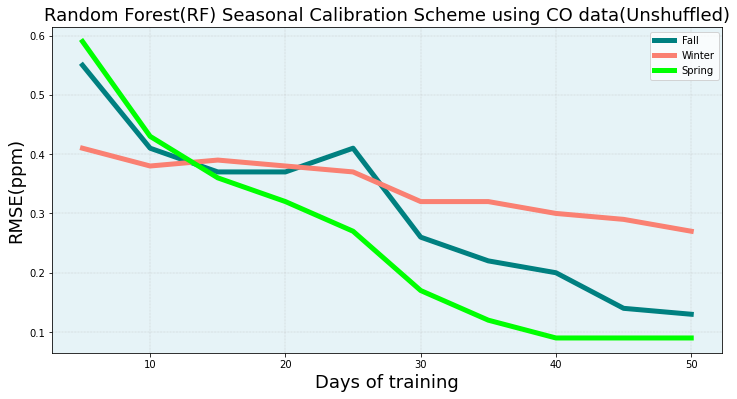

In [132]:
fig= plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(Day,Rmse7_rf,color='teal',linewidth=5)
plt.plot(Day,Rmse8_rf,color='salmon',linewidth=5)
plt.plot(Day,Rmse9_rf,color='lime',linewidth=5)

plt.legend(['Fall', 'Winter','Spring'], 
           loc = 2, bbox_to_anchor = (0.885,1))

plt.xlabel('Days of training',fontsize=18)
plt.ylabel('RMSE(ppm)',fontsize=18)
plt.title('Random Forest(RF) Seasonal Calibration Scheme using CO data(Unshuffled)',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)

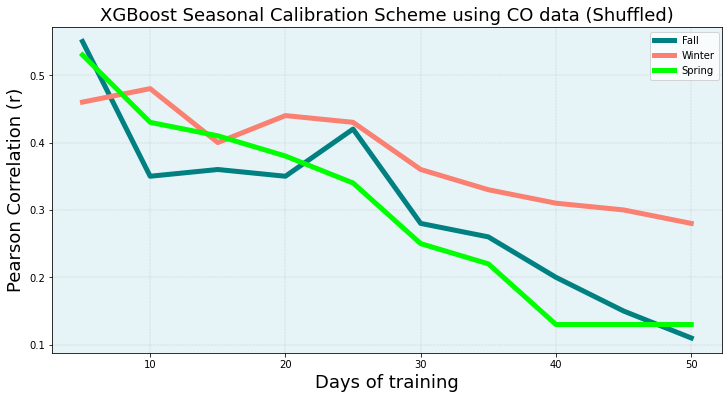

In [133]:
fig= plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(Day,Rmse7_ann,color='teal',linewidth=5)
plt.plot(Day,Rmse8_ann,color='salmon',linewidth=5)
plt.plot(Day,Rmse9_ann,color='lime',linewidth=5)

plt.legend(['Fall', 'Winter','Spring'], 
           loc = 2, bbox_to_anchor = (0.885,1))

plt.xlabel('Days of training',fontsize=18)
plt.ylabel('Pearson Correlation (r)',fontsize=18)
plt.title('XGBoost Seasonal Calibration Scheme using CO data (Shuffled)',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)

In [134]:
#import chart_studio
import plotly.express as px
from IPython.display import Image
import plotly.graph_objects as go
import numpy as np

Day_1_rf=[RMSE7_rf[0],RMSE8_rf[0],RMSE9_rf[0]]
Day_2_rf=[RMSE7_rf[1],RMSE8_rf[1],RMSE9_rf[1]]
Day_3_rf=[RMSE7_rf[2],RMSE8_rf[2],RMSE9_rf[2]]
Day_4_rf=[RMSE7_rf[3],RMSE8_rf[3],RMSE9_rf[3]]
Day_5_rf=[RMSE7_rf[4],RMSE8_rf[4],RMSE9_rf[4]]
Day_6_rf=[RMSE7_rf[5],RMSE8_rf[5],RMSE9_rf[5]]
Day_7_rf=[RMSE7_rf[6],RMSE8_rf[6],RMSE9_rf[6]]
Day_8_rf=[RMSE7_rf[7],RMSE8_rf[7],RMSE9_rf[7]]
Day_9_rf=[RMSE7_rf[8],RMSE8_rf[8],RMSE9_rf[8]]
Day_10_rf=[RMSE7_rf[9],RMSE8_rf[9],RMSE9_rf[9]]

Day_1_ann=[RMSE7_ann[0],RMSE8_ann[0],RMSE9_ann[0]]
Day_2_ann=[RMSE7_ann[1],RMSE8_ann[1],RMSE9_ann[1]]
Day_3_ann=[RMSE7_ann[2],RMSE8_ann[2],RMSE9_ann[2]]
Day_4_ann=[RMSE7_ann[3],RMSE8_ann[3],RMSE9_ann[3]]
Day_5_ann=[RMSE7_ann[4],RMSE8_ann[4],RMSE9_ann[4]]
Day_6_ann=[RMSE7_ann[5],RMSE8_ann[5],RMSE9_ann[5]]
Day_7_ann=[RMSE7_ann[6],RMSE8_ann[6],RMSE9_ann[6]]
Day_8_ann=[RMSE7_ann[7],RMSE8_ann[7],RMSE9_ann[7]]
Day_9_ann=[RMSE7_ann[8],RMSE8_ann[8],RMSE9_ann[8]]
Day_10_ann=[RMSE7_ann[9],RMSE8_ann[9],RMSE9_ann[9]]


In [135]:
Day_1_RF=[Rmse7_rf[0],Rmse8_rf[0],Rmse9_rf[0]]
Day_2_RF=[Rmse7_rf[1],Rmse8_rf[1],Rmse9_rf[1]]
Day_3_RF=[Rmse7_rf[2],Rmse8_rf[2],Rmse9_rf[2]]
Day_4_RF=[Rmse7_rf[3],Rmse8_rf[3],Rmse9_rf[3]]
Day_5_RF=[Rmse7_rf[4],Rmse8_rf[4],Rmse9_rf[4]]
Day_6_RF=[Rmse7_rf[5],Rmse8_rf[5],Rmse9_rf[5]]
Day_7_RF=[Rmse7_rf[6],Rmse8_rf[6],Rmse9_rf[6]]
Day_8_RF=[Rmse7_rf[7],Rmse8_rf[7],Rmse9_rf[7]]
Day_9_RF=[Rmse7_rf[8],Rmse8_rf[8],Rmse9_rf[8]]
Day_10_RF=[Rmse7_rf[9],Rmse8_rf[9],Rmse9_rf[9]]

Day_1_ANN=[Rmse7_ann[0],Rmse8_ann[0],Rmse9_ann[0]]
Day_2_ANN=[Rmse7_ann[1],Rmse8_ann[1],Rmse9_ann[1]]
Day_3_ANN=[Rmse7_ann[2],Rmse8_ann[2],Rmse9_ann[2]]
Day_4_ANN=[Rmse7_ann[3],Rmse8_ann[3],Rmse9_ann[3]]
Day_5_ANN=[Rmse7_ann[4],Rmse8_ann[4],Rmse9_ann[4]]
Day_6_ANN=[Rmse7_ann[5],Rmse8_ann[5],Rmse9_ann[5]]
Day_7_ANN=[Rmse7_ann[6],Rmse8_ann[6],Rmse9_ann[6]]
Day_8_ANN=[Rmse7_ann[7],Rmse8_ann[7],Rmse9_ann[7]]
Day_9_ANN=[Rmse7_ann[8],Rmse8_ann[8],Rmse9_ann[8]]
Day_10_ANN=[Rmse7_ann[9],Rmse8_ann[9],Rmse9_ann[9]]


In [140]:
RF_P=Day_1_rf+Day_2_rf+Day_3_rf+Day_4_rf+Day_5_rf+Day_6_rf+Day_7_rf+Day_8_rf+Day_9_rf+Day_10_rf
XGBoost_P=Day_1_ann+Day_2_ann+Day_3_ann+Day_4_ann+Day_5_ann+Day_6_ann+Day_7_ann+Day_8_ann+Day_9_ann+Day_10_ann
RF_R=Day_1_RF+Day_2_RF+Day_3_RF+Day_4_RF+Day_5_RF+Day_6_RF+Day_7_RF+Day_8_RF+Day_9_RF+Day_10_RF
XGBoost_R=Day_1_ANN+Day_2_ANN+Day_3_ANN+Day_4_ANN+Day_5_ANN+Day_6_ANN+Day_7_ANN+Day_8_ANN+Day_9_ANN+Day_10_ANN
x0=['0' for i in range(3)]
x1=['5' for i in range(3)]
x2=['10' for i in range(3)]
x3=['15' for i in range(3)]
x4=['20' for i in range(3)]
x5=['25' for i in range(3)]
x6=['30' for i in range(3)]
x7=['35' for i in range(3)]
x8=['40' for i in range(3)]
x9=['45' for i in range(3)]
x10=['50' for i in range(3)]
x11=['55' for i in range(3)]
Reg=[0.1 for i in range(36)]
Spatial=[0.25 for i in range(36) ]
Intervention=[0.3 for i in range(36) ]
Hs_and_sp=[0.5 for i in range(36) ]


x=x1+x2+x3+x4+x5+x6+x7+x8+x9+x10
X=x0+x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11

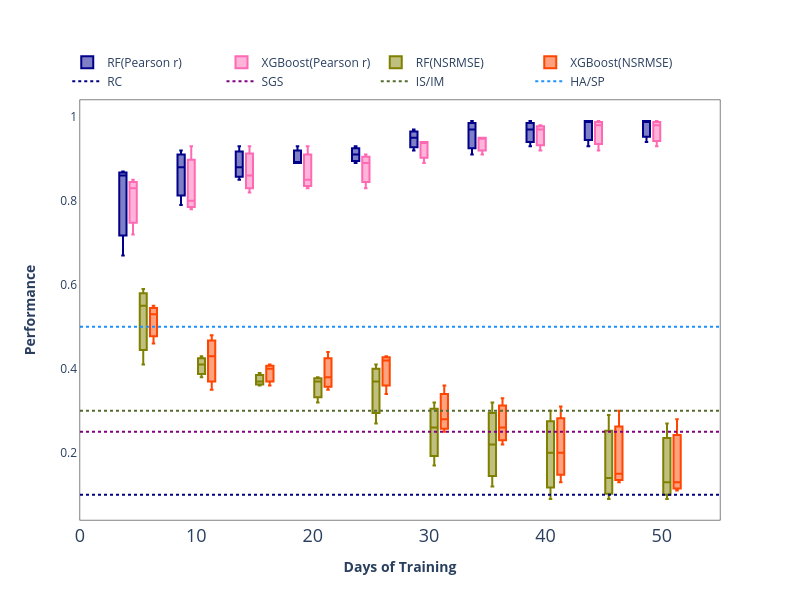

In [141]:
fig = go.Figure()
x = x
fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=RF_P,
    x=x,
    name='RF(Pearson r)',
    marker_color='darkblue',
    showlegend=True
))
fig.add_trace(go.Box(
    y=XGBoost_P,
    x=x,
    name='XGBoost(Pearson r)',
    marker_color='hotpink',
    showlegend=True

))

fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=RF_R,
    x=x,
    name='RF(NSRMSE)',
    marker_color='olive',
    showlegend=True
))
fig.add_trace(go.Box(
    y=XGBoost_R,
    x=x,
    name='XGBoost(NSRMSE)',
    marker_color='orangered',
    showlegend=True

))
fig.add_trace(go.Scatter(x=X,
                y=Reg, 
                name="RC",
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'navy', dash = 'dot'),
                connectgaps = True,
                showlegend=True
                        ))
fig.add_trace(go.Scatter(x=X,
                y=Spatial, 
                name="SGS",
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'purple', dash = 'dot'),
                connectgaps = True,
                showlegend=True
                    
                        ))
fig.add_trace(go.Scatter(x=X,
                y=Intervention, 
                name="IS/IM",
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'darkolivegreen', dash = 'dot'),
                connectgaps = True,
                showlegend=True
                
                        ))
fig.add_trace(go.Scatter(x=X,
                y=Hs_and_sp, 
                name="HA/SP",
                    
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'dodgerblue', dash = 'dot'),
                connectgaps = True,
                showlegend=True
               
                        ))
fig.update_layout(autosize=False,
                   #title={'text': "<b>CO Seasonal Calibration Scheme</b>",
        #'y':0.83,
        #'x':0.5,
        #'xanchor': 'center',
        #'yanchor': 'top'}, 
    width=800,
    height=600,
     legend=dict( yanchor="bottom",
    y=1.01,
    x=-0.02,
    orientation="h"
),           
  
    # group together boxes of the different
    # traces for each value of x
    boxmode='group',
                  plot_bgcolor='rgba(0,0,0,0)'
)

fig.update_xaxes(title_text="<b>Days of Training</b>",tickfont = dict(size=18), linecolor='black',
                 mirror=True,linewidth=0.5)
fig.update_yaxes(title_text="<b>Performance</b>",linecolor='black',
                 mirror=True,linewidth=0.5)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_boxplot.png')
Image('models_boxplot.png')